<a href="https://colab.research.google.com/github/mamekra/African-credit-Scoring-Zindi-competition/blob/main/African_credit_Scoring_Zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nbstripout

In [4]:
!nbstripout African credit Scoring Zindi

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2067c97510010bf7d3c2802f3e9c442050e46fcd5f5d2130b0d6728f4f55ed73
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

**Load datasets and create Profile Reports**

In [ ]:
# Loading the train dataset
# Creation of Profile Report for each dataset
train= pd.read_csv('Train.csv')
train_profile = ProfileReport(train, title="Train Report")

test= pd.read_csv('Test.csv')
test_profile = ProfileReport(test, title="Test Report")

indicator_df = pd.read_csv('economic_indicators.csv')
indicator_profile = ProfileReport(indicator_df, title="Indicators Report")

**Data Analysis & Understanding via profile reports**

In [ ]:
# Export reports to html files
train_profile.to_file("train_report.html")
test_profile.to_file("test_report.html")
indicator_profile.to_file("indicator_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# combine the train and test data frames
data = pd.concat([train, test]).reset_index(drop=True)

In [ ]:
data.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,Amount_Funded_By_Lender,Lender_portion_Funded,...,target,loan_term_days,loan_interest,disbursement_date_month,disbursement_date_day,disbursement_date_year,due_date_month,due_date_day,due_date_year,Year
count,87248.000000,87248.000000,87248.000000,87248.000000,8.724800e+04,87248,87248,87248.000000,8.724800e+04,87248.000000,...,68654.000000,87248.000000,87248.000000,87248.000000,87248.000000,87248.000000,87248.000000,87248.000000,87248.000000,87248.000000
mean,256116.341761,267182.282539,267583.339870,8.561301,1.567067e+04,2022-10-15 10:11:16.031542528,2022-10-25 00:45:40.106363648,9.607223,2.488711e+03,0.216209,...,0.018324,9.607223,2.338532,8.721965,16.346931,2022.103830,8.950486,15.967266,2022.112003,2022.103830
min,145.000000,101323.000000,245684.000000,1.098612,0.000000e+00,2021-10-04 00:00:00,2021-10-21 00:00:00,1.000000,0.000000e+00,0.000000,...,0.000000,1.000000,-100.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,2021.000000,2021.000000
25%,249194.000000,235931.750000,267278.000000,7.723120,2.291000e+03,2022-08-08 00:00:00,2022-08-17 00:00:00,7.000000,2.364000e+02,0.130000,...,0.000000,7.000000,0.000000,8.000000,9.000000,2022.000000,8.000000,8.000000,2022.000000,2022.000000
50%,256357.000000,262505.500000,267278.000000,8.536996,5.218000e+03,2022-09-16 00:00:00,2022-09-23 00:00:00,7.000000,8.725500e+02,0.300000,...,0.000000,7.000000,1.083358,9.000000,17.000000,2022.000000,9.000000,17.000000,2022.000000,2022.000000
75%,263376.000000,290072.250000,267278.000000,9.324562,1.141300e+04,2022-10-24 00:00:00,2022-11-01 00:00:00,7.000000,2.219400e+03,0.300000,...,0.000000,7.000000,3.005900,10.000000,24.000000,2022.000000,10.000000,24.000000,2022.000000,2022.000000
max,312737.000000,375320.000000,297183.000000,16.951005,2.541500e+07,2024-11-14 00:00:00,2025-10-27 00:00:00,1096.000000,1.600000e+06,1.168119,...,1.000000,1096.000000,216.486486,12.000000,31.000000,2024.000000,12.000000,31.000000,2025.000000,2024.000000
std,27354.200158,43431.469302,6902.272878,1.265046,1.700307e+05,NaN,NaN,20.668906,1.103074e+04,0.128307,...,0.134120,20.668906,5.937244,1.776713,8.718952,0.420818,1.804521,9.204152,0.432254,0.420818


In [ ]:
indicator_df.head()

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750


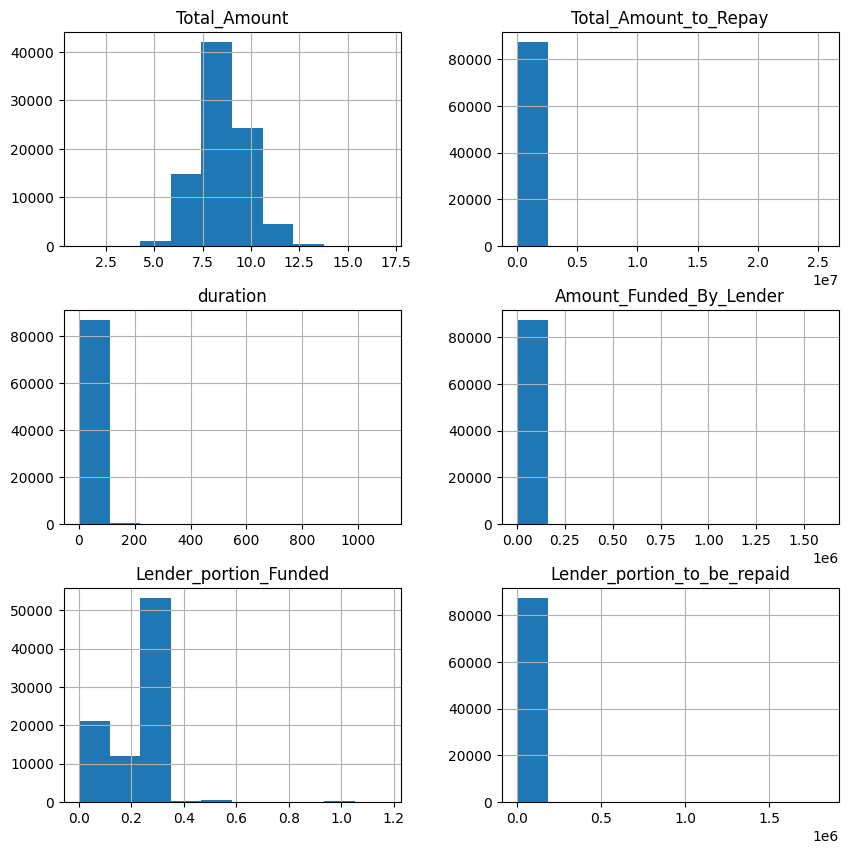

In [ ]:
dfplt = data[['Total_Amount','Total_Amount_to_Repay','duration','Amount_Funded_By_Lender','Lender_portion_Funded','Lender_portion_to_be_repaid']]
dfplt.hist(figsize=(10, 10))
plt.show()

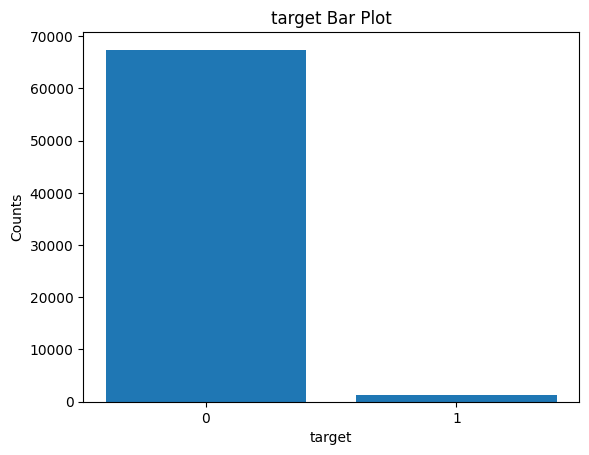

In [ ]:
target_counts = data['target'].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.title('target Bar Plot')
plt.xlabel('target')
plt.ylabel('Counts')
plt.xticks(target_counts.index, ['0', '1'])
plt.show()

**Data Cleaning - Feature Engineering**


In [ ]:
# Feature engineering
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime, handle invalid parsing as NaT

# Convert the datetime columns appropriately
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, and year from the date columns
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year

# Calculate loan term in days, the total days the customer has to pay off his loan
data['loan_term_days'] = (data['due_date'] - data['disbursement_date']).dt.days

# Calculate loan interest rate, the interest of the loan
data['loan_interest'] = ((data['Total_Amount_to_Repay'] - data['Total_Amount']) / data['Total_Amount']) * 100

# Select all categorical columns from the dataset and label encode them or one hot encode
cat_cols = data.select_dtypes(include='object').columns
num_cols = [col for col in data.select_dtypes(include='number').columns if col not in ['target']]
print(f"The categorical columns are: {cat_cols}.")
print("-"* 100)
print(f"The numerical columns are: {num_cols}")
print("-"* 100)

# deal with numerical columns: we saw loan amount is  highly right skewed for this we can log transform it
data['Total_Amount'] = np.log1p(data['Total_Amount']) # study other numerical columns and see if they are skewed as well


The categorical columns are: Index(['ID', 'country_id', 'loan_type', 'New_versus_Repeat'], dtype='object').
----------------------------------------------------------------------------------------------------
The numerical columns are: ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year', 'loan_term_days', 'loan_interest']
----------------------------------------------------------------------------------------------------


Transform indicator_df dataframe and bring it to the wanted form in order to combine it with the data(train+test) dataframe. Change the dimentions convert separate year columns into one 'Year', select only the data refering to 'Kenya' and 'Ghana', keep only the economic indicators: 'infation,consumer prices','deposit interest rate' and 'unempoyment rate', then pivot the data so the final dataframe has separate columns for each indicator and then merge it to the 'data' dataframe.

In [ ]:
# Melt the indicators_df wide format into a long format
economic_indicators_long = pd.melt(
    indicator_df,
    id_vars=['Country', 'Indicator'],
    var_name='Year',
    value_name='Value'
)
# Clean up the Year column (remove "YR" prefix)
economic_indicators_long['Year'] = economic_indicators_long['Year'].str.replace('YR', '').astype(int)

#Keep only the data which is not reffering to Cote d'Ivoire, because out train set is only for Kenya and our test set is for Gnana
economic_indicators_long = economic_indicators_long[economic_indicators_long['Country'] != "Cote d'Ivoire"]

print(economic_indicators_long.head())

  Country                                          Indicator  Year      Value
0   Ghana              Inflation, consumer prices (annual %)  2001  41.509496
2   Kenya              Inflation, consumer prices (annual %)  2001   5.738598
3   Ghana  Official exchange rate (LCU per US$, period av...  2001   0.716305
5   Kenya  Official exchange rate (LCU per US$, period av...  2001  78.563195
6   Ghana                             Real interest rate (%)  2001        NaN


In [ ]:
# Filter the economic indicators and select only Inflation,consumer prices,Deposit interest rate,Unemployment rate
# These economic indicators are suitable for the credit scorring problem bacause they actually affect loans
filtered_indicators = economic_indicators_long[
    economic_indicators_long['Indicator'].isin(['Inflation, consumer prices (annual %)','Deposit interest rate (%)','Unemployment rate'])]

# Preview the filtered indicators
print(filtered_indicators.head())

   Country                              Indicator  Year      Value
0    Ghana  Inflation, consumer prices (annual %)  2001  41.509496
2    Kenya  Inflation, consumer prices (annual %)  2001   5.738598
12   Ghana              Deposit interest rate (%)  2001  30.854167
14   Kenya              Deposit interest rate (%)  2001   6.639167
24   Ghana                      Unemployment rate  2001   9.604000


In [ ]:
# Pivot the filtered_indicators dataset
indicators_pivoted = filtered_indicators.pivot_table(
    index=['Country', 'Year'],  # Use Country and Year as the unique index
    columns='Indicator',        # Pivot on the Indicator column
    values='Value',             # Use Value as the data
    aggfunc='first'             # Use 'first' to handle duplicates
).reset_index()

# Flatten the column index
indicators_pivoted.columns = [col if isinstance(col, str) else col[1] for col in indicators_pivoted.columns]

# Preview the pivoted dataset
print(indicators_pivoted.head())
print(f"Shape of indicators_pivoted: {indicators_pivoted.shape}")


  Country  Year  Deposit interest rate (%)  \
0   Ghana  2001                  30.854167   
1   Ghana  2002                  16.208333   
2   Ghana  2003                  14.323333   
3   Ghana  2004                  13.625000   
4   Ghana  2005                  10.162500   

   Inflation, consumer prices (annual %)  Unemployment rate  
0                              41.509496              9.604  
1                               9.360932              8.698  
2                              29.772980              7.722  
3                              18.042739              6.757  
4                              15.438992              5.817  
Shape of indicators_pivoted: (46, 5)


Final merge of 'data' and 'indicators_pivoted' dataframes, along with renames and dropping of unwanted columns

In [ ]:
# New column 'Country' to map the country_id column to actual country names
# Creation of merge columns Country,Year to merge the 'data' dataframe with the economic indicators dataframe
data['Country'] = data['country_id']
data['Year']=data['disbursement_date_year']


In [ ]:
# Merge data with the pivoted economic indicators
data_merged = pd.merge(
    data,
    indicators_pivoted,
    how='left',                 # Left join to retain all rows in data
    on=['Country', 'Year']      # Match on Country and Year
)
# Verify the merged dataset
print(data_merged.head())
print(f"Shape of data_merged: {data_merged.shape}")


                      ID  customer_id country_id  tbl_loan_id  lender_id  \
0  ID_266671248032267278       266671      Kenya       248032     267278   
1  ID_248919228515267278       248919      Kenya       228515     267278   
2  ID_308486370501251804       308486      Kenya       370501     251804   
3  ID_266004285009267278       266004      Kenya       285009     267278   
4  ID_253803305312267278       253803      Kenya       305312     267278   

  loan_type  Total_Amount  Total_Amount_to_Repay disbursement_date   due_date  \
0    Type_1      9.041803                 8448.0        2022-08-30 2022-09-06   
1    Type_1     10.161844                25979.0        2022-07-30 2022-08-06   
2    Type_7      8.839422                 7142.0        2024-09-06 2024-09-13   
3    Type_1      9.100414                 9233.0        2022-10-20 2022-10-27   
4    Type_1      8.426174                 4728.0        2022-11-28 2022-12-05   

   ...  due_date_month due_date_day  due_date_year  loan

In [ ]:
data_merged = data_merged.rename(columns={'Inflation, consumer prices (annual %)': 'inflation',
                                        'Deposit interest rate (%)': 'deposit_rate',
                                        'Unemployment rate': 'unemployment_rate'})

In [ ]:
# Drop the columns that are not needed
#Country: no need, we have the column country_id to identify the countries
#Year: no need, there is the column disbursement_date_year which is the same
#customer_id, lender_id,tbl_loan_id : not important information for the model training
#loan_type:
#New_versus_Repeat: more than 90% of the values are 'Repeat Loan' , so no need for this column
#disbursement_date, due_date: drop these columns because we have created new ones separating day,month,year

data_merged=data_merged.drop(columns=['Country','Year','customer_id','lender_id','tbl_loan_id','loan_type','New_versus_Repeat','disbursement_date', 'due_date'])

Spitting the data back to train and test dataframes

In [ ]:
# Splitting the data back into train and test
train_df = data_merged[data_merged['ID'].isin(train['ID'].unique())]

test_df = data_merged[data_merged['ID'].isin(test['ID'].unique())]

# we are also going to drop the country id as we saw we have only one country in train
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

# Check if the new datasets have the same rows as train and test datasets
print(f"The shape of train_df is: {train_df.shape}")
print(f"The shape of test_df is: {test_df.shape}")
print(f"The shape of train is: {train.shape}")
print(f"The shape of test is: {test.shape}")
print(f"The features for modelling are:\n{features_for_modelling}")

The shape of train_df is: (68654, 20)
The shape of test_df is: (18594, 20)
The shape of train is: (68654, 16)
The shape of test is: (18594, 15)
The features for modelling are:
['Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year', 'loan_term_days', 'loan_interest', 'deposit_rate', 'inflation', 'unemployment_rate']


In [ ]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87248 entries, 0 to 87247
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           87248 non-null  object 
 1   country_id                   87248 non-null  object 
 2   Total_Amount                 87248 non-null  float64
 3   Total_Amount_to_Repay        87248 non-null  float64
 4   duration                     87248 non-null  int64  
 5   Amount_Funded_By_Lender      87248 non-null  float64
 6   Lender_portion_Funded        87248 non-null  float64
 7   Lender_portion_to_be_repaid  87248 non-null  float64
 8   target                       68654 non-null  float64
 9   loan_term_days               87248 non-null  int64  
 10  loan_interest                87248 non-null  float64
 11  disbursement_date_month      87248 non-null  int32  
 12  disbursement_date_day        87248 non-null  int32  
 13  disbursement_dat

Handling of Null values in numeric columns, so the train_df and test_df are complete

In [ ]:
numeric_cols = train_df.select_dtypes(include=np.number).columns
num_cols = test_df.select_dtypes(include=np.number).columns

# Fill missing values with median for simplicity
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

<ipython-input-17-8f21123bef88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
<ipython-input-17-8f21123bef88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())


Split test/train sets only for features_for_modelling columns (which do not include ID, country_id, target)
Create also scaled sets by using StandarScaler for normalization of feature values and ensure that the features contribute equally to the model.
Also, create resampled sets using SMOTEEN which is used for genarating samples for the minority class and remove noisy samples from the dominant class. This helps to overcome target class imbalances.

In [ ]:
# Test/ Train split
x_train, x_valid, y_train, y_valid = train_test_split(train_df[features_for_modelling], train['target'], stratify=train['target'], shuffle=True, random_state=42)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(51490, 17) (17164, 17) (51490,) (17164,)


In [ ]:
# Standard Scaling to normalize the feature values
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

In [ ]:
# Using SMOTE in order to oversample the minority class
smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x_train_scaled, y_train)

**Logistic Regression**

In [ ]:
# Logistic Regression Classifier
lg_clf = LogisticRegression(random_state=42,class_weight='balanced')
lg_clf.fit(x_resampled, y_resampled)

# Predictions
y_pred_lg = lg_clf.predict(x_valid_scaled)
y_pred_proba_lg = lg_clf.predict_proba(x_valid_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_valid, y_pred_lg)
f1 = f1_score(y_valid, y_pred_lg)
roc_auc = roc_auc_score(y_valid, y_pred_proba_lg)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nLogistic Regression Classification Report:\n", classification_report(y_valid, y_pred))
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9579
F1 Score: 0.4552

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16849
           1       0.71      0.44      0.54       315

    accuracy                           0.99     17164
   macro avg       0.85      0.72      0.77     17164
weighted avg       0.98      0.99      0.98     17164

ROC AUC Score: 0.9874


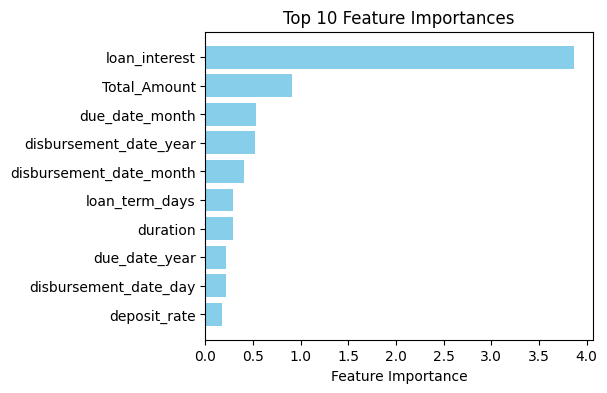

In [ ]:
# Feature Importance for Logistic Regression
feature_importances = np.abs(lg_clf.coef_).flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(5, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
# Make predictions on the test dataset (probabilities)
test_predictions = lg_clf.predict(test_df[features_for_modelling])
test_predictions_prob = lg_clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Convert probabilities to binary outcomes based on a threshold (default is 0.5)
threshold = 0.5
test_predictions_binary = (test_predictions_prob >= threshold).astype(int)

# Create the submission DataFrame
test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column
sub = test_df[['ID', 'target']]  # Include only the ID and the 'target' column (predictions)

# Save the predictions to a CSV file
sub.to_csv('logistic_regression_submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
<ipython-input-60-314628c819b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column


**Random Forest**

In [ ]:
# Random Forest Classifier model
rf_clf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    random_state=42
)
# Train the model
rf_clf.fit(x_resampled,y_resampled)

# Predict and evaluate
y_pred_rf = rf_clf.predict(x_valid_scaled)
y_pred_proba_rf = rf_clf.predict_proba(x_valid_scaled)[:, 1]

# Metrics
print("Random Forest Classification Report:")
print(classification_report(y_valid, y_pred_rf))
print(f"ROC AUC Score: {roc_auc_score(y_valid, y_pred_proba_rf):.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     16849
           1       0.70      0.94      0.81       315

    accuracy                           0.99     17164
   macro avg       0.85      0.97      0.90     17164
weighted avg       0.99      0.99      0.99     17164

ROC AUC Score: 0.9924


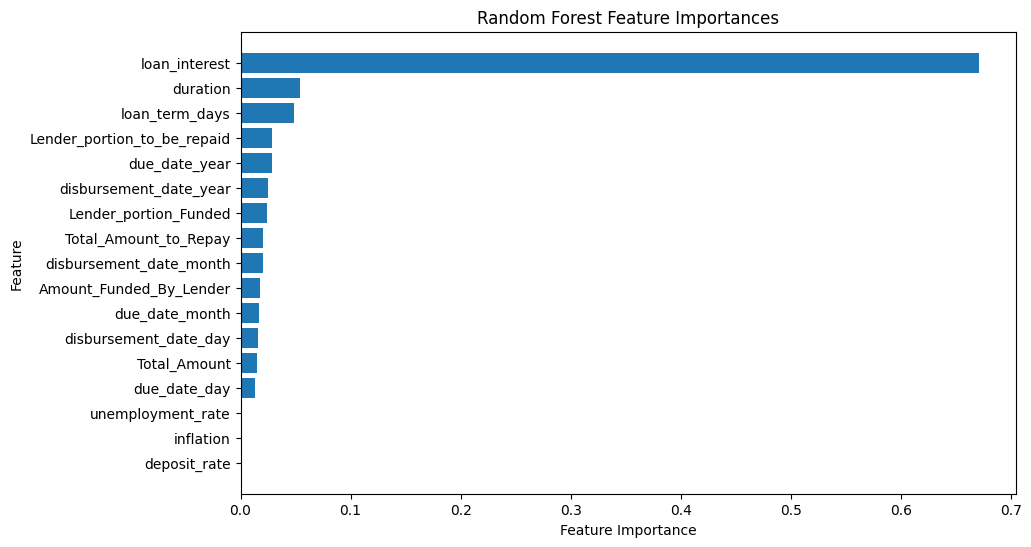

In [ ]:
# Feature importances Random Forest
rf_feature_importances = rf_clf.feature_importances_

# Plot
sorted_idx = rf_feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), rf_feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [features_for_modelling[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
# Make predictions on the test dataset (probabilities)
test_predictions = rf_clf.predict(test_df[features_for_modelling])
test_predictions_prob = rf_clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Convert probabilities to binary outcomes based on a threshold (default is 0.5)
threshold = 0.5
test_predictions_binary = (test_predictions_prob >= threshold).astype(int)

# Create the submission DataFrame
test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column
sub = test_df[['ID', 'target']]  # Include only the ID and the 'target' column (predictions)

# Save the predictions to a CSV file
sub.to_csv('random_forest_submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
<ipython-input-37-0d9f10eb9ae1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['target'] = test_predictions


**Decission Tree**

In [ ]:
# Initialize the decision tree model
dt_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,               # Limit depth to prevent overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
# Train the model
dt_clf.fit(x_train,y_train)

# Predict on validation set
y_pred_dt = dt_clf.predict(x_valid)
y_pred_proba_dt = dt_clf.predict_proba(x_valid)[:, 1]

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_valid, y_pred_dt))
print(f"ROC AUC Score: {roc_auc_score(y_valid, y_pred_proba_dt):.4f}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16849
           1       0.87      0.82      0.84       315

    accuracy                           0.99     17164
   macro avg       0.94      0.91      0.92     17164
weighted avg       0.99      0.99      0.99     17164

ROC AUC Score: 0.9695


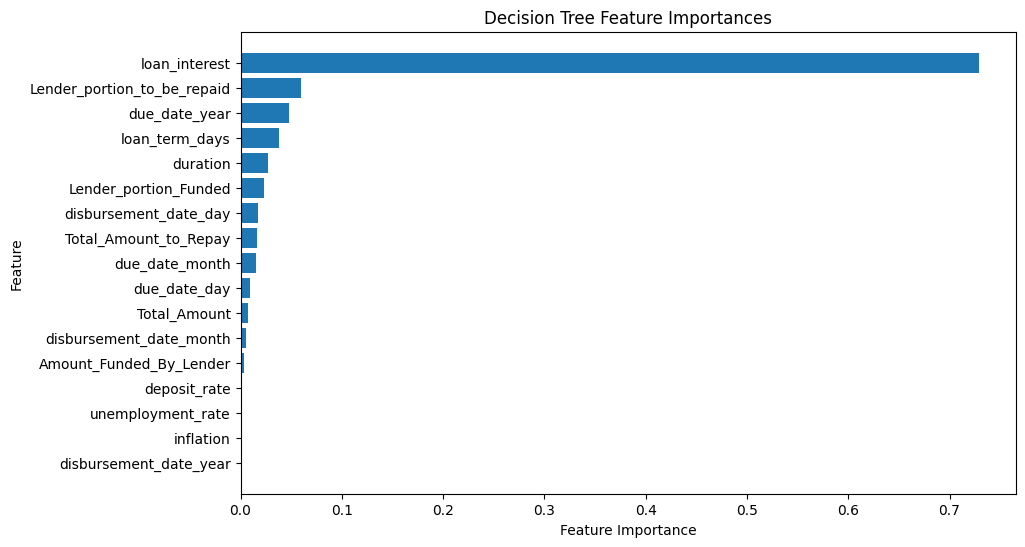

In [ ]:
# Feature importances Decission Tree
dt_feature_importances = dt_clf.feature_importances_

# Plot
sorted_idx = dt_feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), dt_feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [features_for_modelling[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

In [ ]:
# Make predictions on the test dataset (probabilities)
test_predictions_prob = dt_clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Convert probabilities to binary outcomes based on a threshold (default is 0.5)
threshold = 0.5
test_predictions_binary = (test_predictions_prob >= threshold).astype(int)

# Create the submission DataFrame
test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column
sub = test_df[['ID', 'target']]  # Include only the ID and the 'target' column (predictions)

# Save the predictions to a CSV file
sub.to_csv('decission_tree_submission.csv', index=False)

<ipython-input-86-5d2456c933a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column


**SVM kernel='rbf'**

In [ ]:
#kernel rbf
svm_clf = SVC(
    kernel='rbf',
    C=100,
    gamma=0.01,
    probability=True,
    random_state=42
)
svm_clf.fit(x_train_scaled, y_train)
# Predict and evaluate
y_pred_svm= svm_clf.predict(x_valid_scaled)
y_pred_proba_svm = svm_clf.predict_proba(x_valid_scaled)[:, 1]

print("SVM Classification Report:")
print(classification_report(y_valid, y_pred_svm))
print(f"ROC AUC Score: {roc_auc_score(y_valid, y_pred_proba_svm):.4f}")

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16849
           1       0.87      0.73      0.80       315

    accuracy                           0.99     17164
   macro avg       0.93      0.87      0.90     17164
weighted avg       0.99      0.99      0.99     17164

ROC AUC Score: 0.9810


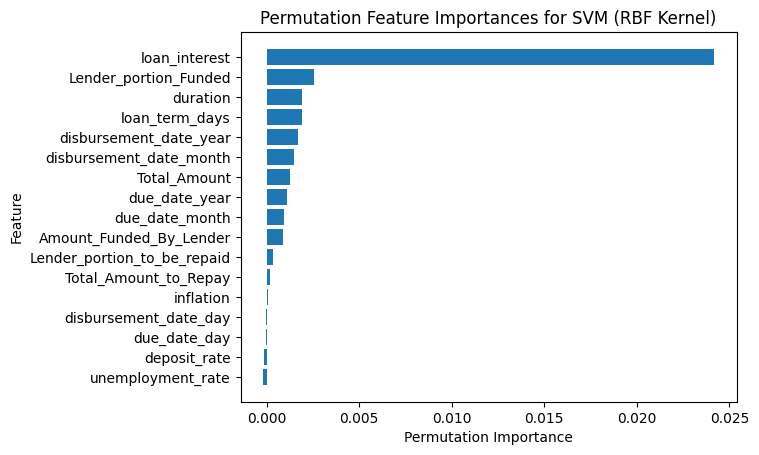

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance SVM 'rbf' kernel
perm_importance = permutation_importance(svm_clf, x_valid_scaled, y_valid, n_repeats=10, random_state=42)

# Extract and sort the importances
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features_for_modelling[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importances for SVM (RBF Kernel)')
plt.show()

In [ ]:
# Make predictions on the test dataset (probabilities)
test_predictions_prob = svm_clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Convert probabilities to binary outcomes based on a threshold (default is 0.5)
threshold = 0.5
test_predictions_binary = (test_predictions_prob >= threshold).astype(int)

# Create the submission DataFrame
test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column
sub = test_df[['ID', 'target']]  # Include only the ID and the 'target' column (predictions)

# Save the predictions to a CSV file
sub.to_csv('svm_submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
<ipython-input-93-205c4e165f65>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column


**XGBoost**

In [ ]:
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_clf.fit(x_train, y_train)
# Predict on validation data
y_pred_xgb = xgb_clf.predict(x_valid)
y_pred_proba_xgb = xgb_clf.predict_proba(x_valid)[:, 1]

# Print evaluation metrics
print("XGBoost Classification Report:")
print(classification_report(y_valid, y_pred_xgb))
print(f"ROC AUC Score: {roc_auc_score(y_valid, y_pred_proba_xgb):.4f}")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16849
           1       0.87      0.84      0.86       315

    accuracy                           0.99     17164
   macro avg       0.93      0.92      0.93     17164
weighted avg       0.99      0.99      0.99     17164

ROC AUC Score: 0.9971


In [ ]:
# Make predictions on the test dataset
test_predictions = xgb_clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Convert probabilities to binary outcomes based on a threshold (default is 0.5)
threshold = 0.5
test_predictions_binary = (test_predictions >= threshold).astype(int)

# Create the submission DataFrame
test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column
sub = test_df[['ID', 'target']]  # Include only the ID and the 'target' column (predictions)

# Save the predictions to a CSV file
sub.to_csv('xgb_submission.csv', index=False)

<ipython-input-118-4bd0b894a9ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column


XGBoost Feature Importances: [0.03659163 0.01752437 0.0910439  0.05339785 0.02172633 0.02107935
 0.03410636 0.02072579 0.13450724 0.03688739 0.01357533 0.09546304
 0.         0.3837766  0.03959481 0.         0.        ]


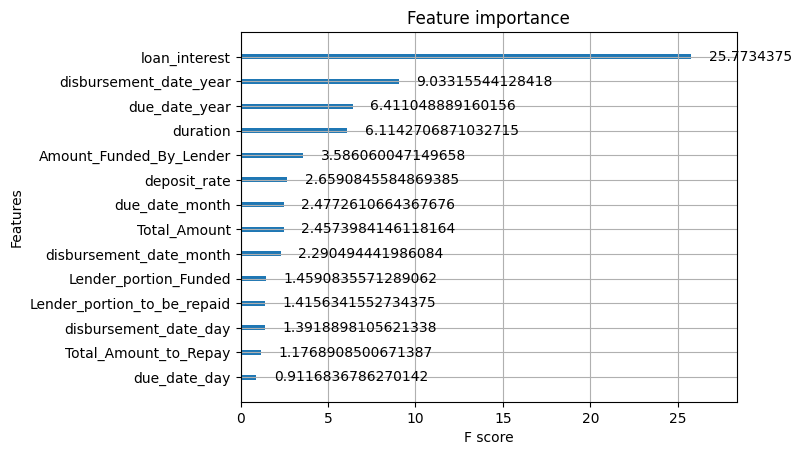

In [ ]:
# Feature importance XGBoost
xgb_feature_importances = xgb_clf.feature_importances_

print("XGBoost Feature Importances:", xgb_feature_importances)
#feature importances plot
xgb.plot_importance(xgb_clf, importance_type='gain')
import matplotlib.pyplot as plt
plt.show()

**LightGBM**

In [ ]:
# LightGBM Classifier
lgbm_clf = lgb.LGBMClassifier(random_state=42)

# Fit the model
lgbm_clf.fit(x_train, y_train)
# Predict on validation data
y_pred_lbgm = lgbm_clf.predict(x_valid)
y_pred_proba_lbgm = lgbm_clf.predict_proba(x_valid)[:, 1]

# Print evaluation metrics
print("LightGBM Classification Report:")
print(classification_report(y_valid, y_pred_lbgm))
print(f"ROC AUC Score: {roc_auc_score(y_valid, y_pred_proba_lbgm):.4f}")


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16849
           1       0.88      0.86      0.87       315

    accuracy                           1.00     17164
   macro avg       0.94      0.93      0.93     17164
weighted avg       1.00      1.00      1.00     17164

ROC AUC Score: 0.9972


In [ ]:
# Make predictions on the test dataset
test_predictions = lgbm_clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Convert probabilities to binary outcomes based on a threshold (default is 0.5)
threshold = 0.5
test_predictions_binary = (test_predictions >= threshold).astype(int)

# Create the submission DataFrame
test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column
sub = test_df[['ID', 'target']]  # Include only the ID and the 'target' column (predictions)

# Save the predictions to a CSV file
sub.to_csv('lgbm_submission.csv', index=False)


<ipython-input-121-b7bc9e75e01b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['target'] = test_predictions_binary  # Save predicted binary labels in 'target' column


LightGBM Feature Importances: [305 253 193 336 251 174 183 279  76 114 199  63   0 562   6   0   6]


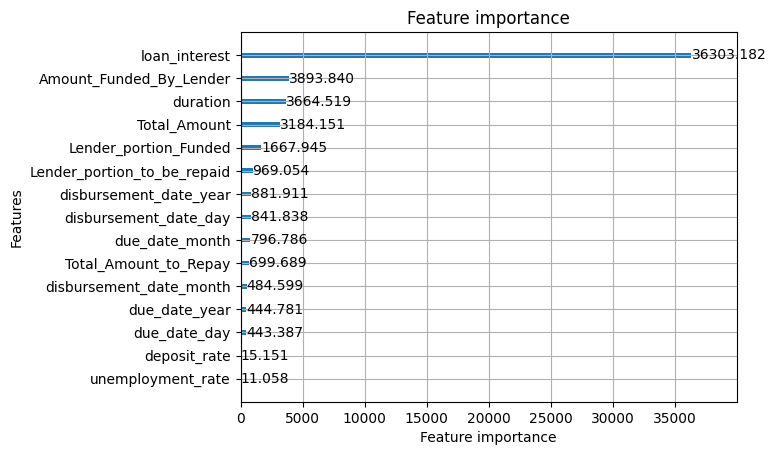

In [ ]:
#Feature importance LightGBM
lgbm_feature_importances = lgbm_clf.feature_importances_

print("LightGBM Feature Importances:", lgbm_feature_importances)

# To visualize feature importances:
lgb.plot_importance(lgbm_clf, importance_type='gain')
plt.show()


**Metrics plots & Confusion Matrix**

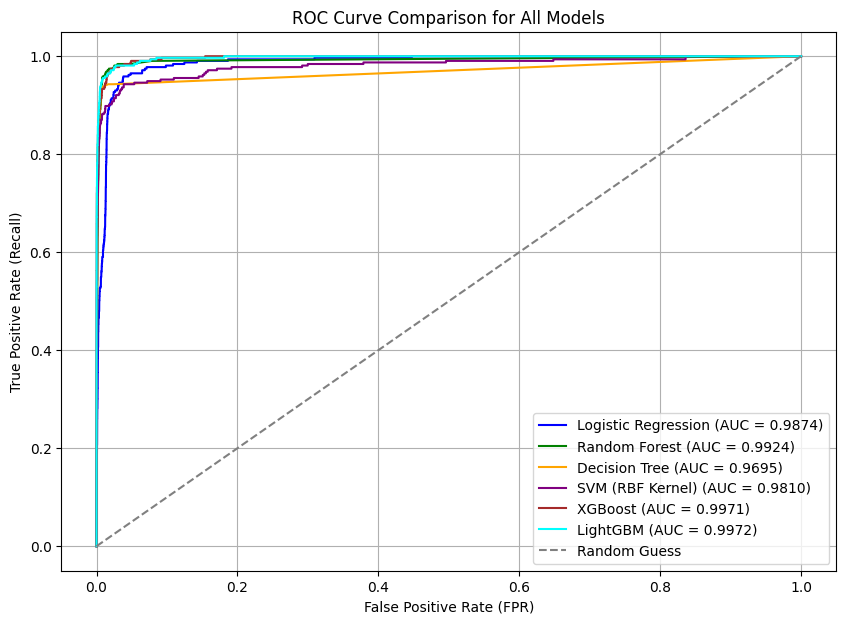

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# Placeholder for model names and their ROC data
models = {
    "Logistic Regression": (y_pred_proba_lg, "blue"),
    "Random Forest": (y_pred_proba_rf, "green"),
    "Decision Tree": (y_pred_proba_dt, "orange"),
    "SVM (RBF Kernel)": (y_pred_proba_svm, "purple"),
    "XGBoost": (y_pred_proba_xgb, "brown"),
    "LightGBM": (y_pred_proba_lbgm, "cyan")
}
plt.figure(figsize=(10, 7))

# Loop through models and plot their ROC curves
for model_name, (y_proba, color) in models.items():
    # Calculate FPR, TPR, and thresholds
    fpr, tpr, _ = roc_curve(y_valid, y_proba)
    auc_score = roc_auc_score(y_valid, y_proba)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})", color=color)

# Add a random guess baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Final plot adjustments
plt.title('ROC Curve Comparison for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

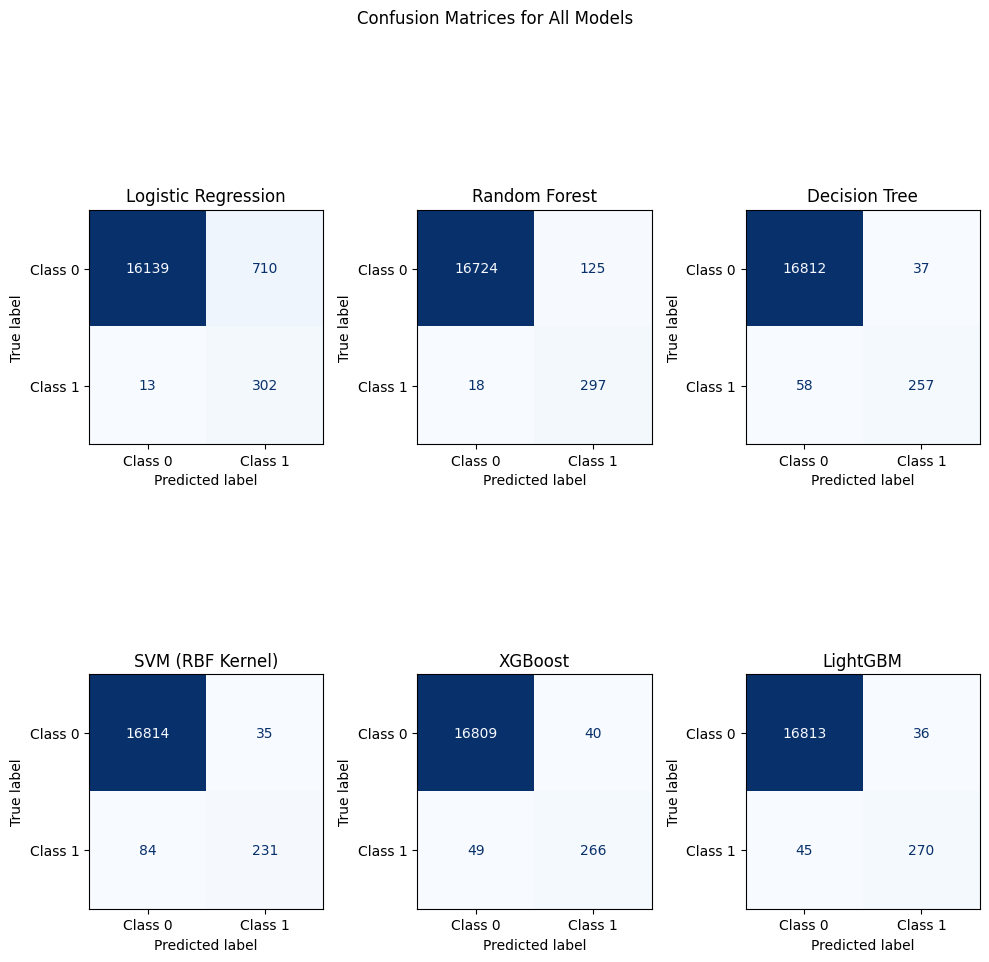

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Placeholder for model names and their predictions
models = {
    "Logistic Regression": y_pred_lg,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_dt,
    "SVM (RBF Kernel)": y_pred_svm,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lbgm
}

# Initialize the plot layout
plt.figure(figsize=(10, 10))
n_models = len(models)
rows = (n_models + 2) // 3
cols = 3
# Loop through each model and plot its confusion matrix
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    # Compute confusion matrix
    cm = confusion_matrix(y_valid, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])

    # Plot in a grid
    plt.subplot(rows, cols, i)
    disp.plot(cmap="Blues", ax=plt.gca(), colorbar=False)  # Plot each confusion matrix
    plt.title(model_name)

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Models", y=1.05)
plt.show()
